In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [7]:
dataset = pd.read_csv('USA_Housing.csv')

In [8]:
X = dataset[['Avg. Area Income', 
             'Avg. Area House Age', 
             'Avg. Area Number of Rooms', 
             'Avg. Area Number of Bedrooms', 
             'Area Population']]
y = dataset['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Avg. Area Income,21.660408
Avg. Area House Age,165809.651149
Avg. Area Number of Rooms,120329.407877
Avg. Area Number of Bedrooms,2193.095579
Area Population,15.285885


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [17]:
df1

,Actual,Predicted
398,8.942511e+05,9.713052e+05
3833,9.329794e+05,9.547172e+05
4836,9.207479e+05,9.075616e+05
4572,6.918549e+05,4.932514e+05
636,7.327332e+05,7.178465e+05
2545,9.452522e+05,1.050148e+06
1161,6.244828e+05,7.127497e+05
2230,8.495661e+05,7.867304e+05
148,1.544380e+06,1.804401e+06
2530,1.535262e+06,1.538825e+06


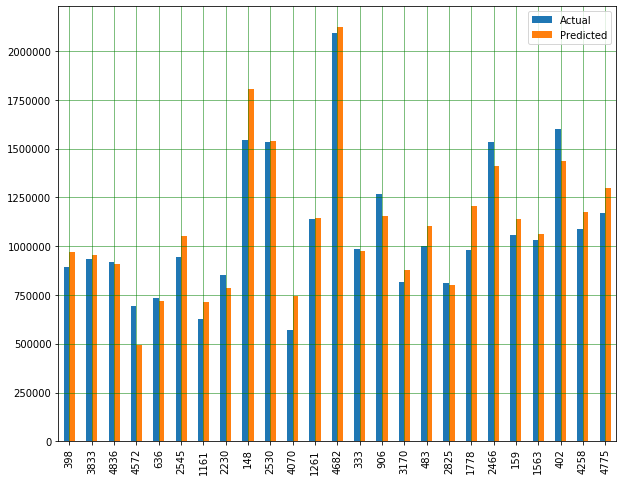

In [20]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 82657.94605893594
Mean Squared Error: 10549721686.164171
Root Mean Squared Error: 102711.83810138036


In [26]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test.to_numpy().reshape(-1,1), y_pred.reshape(-1,1)))

r2_score 0.9146454505137673
